In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/My Drive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [6]:
df = pd.read_csv(file_path)

In [8]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [9]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df['MultipleLines'] = label_encoder.fit_transform(df['MultipleLines'].replace({'No phone service': 'No'}))  # Handle 'No phone service'
df['InternetService'] = label_encoder.fit_transform(df['InternetService'])
df['OnlineSecurity'] = label_encoder.fit_transform(df['OnlineSecurity'].replace({'No internet service': 'No'}))  # Handle 'No internet service'
df['OnlineBackup'] = label_encoder.fit_transform(df['OnlineBackup'].replace({'No internet service': 'No'}))
df['DeviceProtection'] = label_encoder.fit_transform(df['DeviceProtection'].replace({'No internet service': 'No'}))
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'].replace({'No internet service': 'No'}))
df['StreamingTV'] = label_encoder.fit_transform(df['StreamingTV'].replace({'No internet service': 'No'}))
df['StreamingMovies'] = label_encoder.fit_transform(df['StreamingMovies'].replace({'No internet service': 'No'}))
df['Contract'] = label_encoder.fit_transform(df['Contract'])
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])


In [10]:
imputer = SimpleImputer(strategy='mean')  # Use mean for numerical features
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert 'TotalCharges' to numeric, coerce errors to NaN
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

In [11]:
X = df.drop(['Churn', 'customerID'], axis=1)  # Features (excluding 'Churn' and 'customerID')
y = df['Churn'].map({'Yes': 1, 'No': 0})  # Convert target 'Churn' to binary values (1 for churn, 0 for not churn)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [14]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test)


In [16]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [17]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[945  91]
 [201 172]]


In [18]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7927608232789212


In [19]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

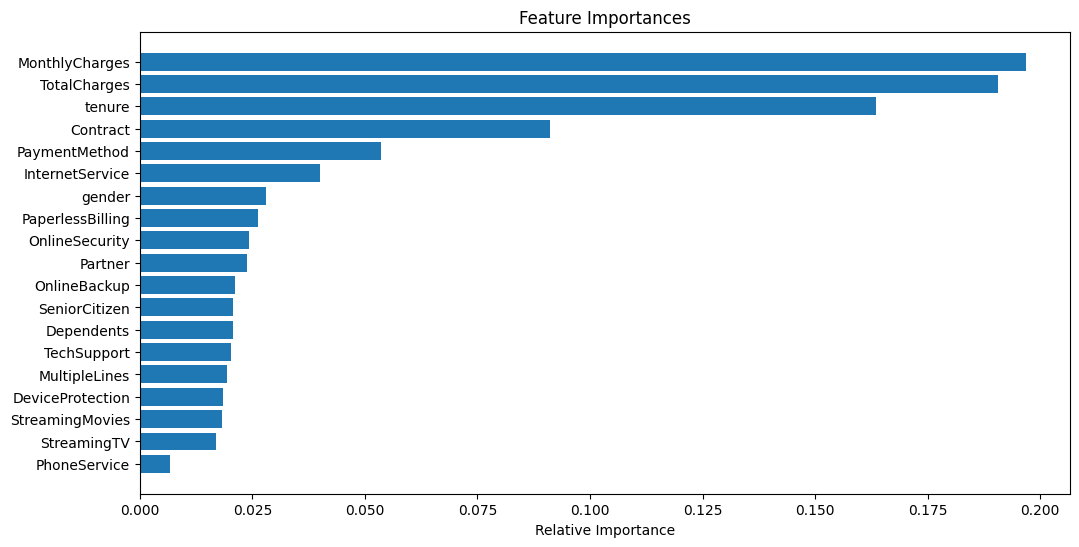

In [20]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [22]:
new_customer = np.array([[1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 100, 12, 1, 1000, 1]])  # Adjust to have 19 features

# Predict churn for the new customer
predicted_churn = model.predict(new_customer)

# Output the prediction (1 for churn, 0 for no churn)
print(f'Predicted churn for the new customer: {predicted_churn[0]}')

Predicted churn for the new customer: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
